# Importing Data and Explotory Data Analysis

In [1]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


In [2]:
#Reading data
df=pd.read_csv(r"C:\Users\aturk\all_breakdown.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      67584 non-null  object 
 1   BIOGAS         67584 non-null  float64
 2   BIOMASS        67584 non-null  float64
 3   GEOTHERMAL     67584 non-null  float64
 4   Hour           67584 non-null  float64
 5   SMALL HYDRO    67584 non-null  float64
 6   SOLAR          22680 non-null  float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     67584 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


In [3]:
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


### Detecting Missing Values

In [4]:
#Detecting missing values
df.isnull().sum()

TIMESTAMP            0
BIOGAS               0
BIOMASS              0
GEOTHERMAL           0
Hour                 0
SMALL HYDRO          0
SOLAR            44904
SOLAR PV         22680
SOLAR THERMAL    22680
WIND TOTAL           0
dtype: int64

In [5]:
#I want to understand the reason of missing values and how solar columns are related
print(len(df["SOLAR"]))

67584


In [6]:
missing_pv=df['SOLAR PV'].isnull()
missing_thermal=df['SOLAR THERMAL'].isnull()
missing_solar=df["SOLAR"].isnull()
missing_both = df[missing_pv & missing_thermal]
missing_all=df[missing_pv & missing_thermal & missing_solar]

In [7]:
print(missing_all)

Empty DataFrame
Columns: [TIMESTAMP, BIOGAS, BIOMASS, GEOTHERMAL, Hour, SMALL HYDRO, SOLAR, SOLAR PV, SOLAR THERMAL, WIND TOTAL]
Index: []


In [8]:
print(missing_pv)

0         True
1         True
2         True
3         True
4         True
         ...  
67579    False
67580    False
67581    False
67582    False
67583    False
Name: SOLAR PV, Length: 67584, dtype: bool


In [9]:
print(missing_both)

                 TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0      2011-07-21 00:00:00   177.0    372.0       984.0   1.0        516.0   
1      2011-07-21 01:00:00   176.0    373.0       984.0   2.0        509.0   
2      2011-07-21 02:00:00   177.0    371.0       985.0   3.0        506.0   
3      2011-07-21 03:00:00   177.0    374.0       985.0   4.0        504.0   
4      2011-07-21 04:00:00   177.0    377.0       984.0   5.0        508.0   
...                    ...     ...      ...         ...   ...          ...   
67507  2011-03-20 19:00:00   148.0    267.0      1074.0  20.0        398.0   
67508  2011-03-20 20:00:00   156.0    284.0      1073.0  21.0        400.0   
67509  2011-03-20 21:00:00   156.0    273.0      1073.0  22.0        400.0   
67510  2011-03-20 22:00:00   155.0    258.0      1074.0  23.0        400.0   
67511  2011-03-20 23:00:00   155.0    273.0      1074.0  24.0        398.0   

       SOLAR  SOLAR PV  SOLAR THERMAL  WIND TOTAL  
0        0.

In [10]:
# I want to see if solar is summation of solar pv and solar thermal. But it doesnt seem like it.
#When solar column has null values, solar pv and solar thermal have valid values. And vice versa
df_subset = df[~(missing_pv & missing_thermal)]
df_subset.head(10)

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
24,2013-05-29 00:00:00,210.0,326.0,895.0,1.0,343.0,NaN,0.0,0.0,3454.0
25,2013-05-29 01:00:00,210.0,323.0,895.0,2.0,341.0,NaN,0.0,0.0,3268.0
26,2013-05-29 02:00:00,210.0,326.0,896.0,3.0,342.0,NaN,0.0,0.0,3202.0
27,2013-05-29 03:00:00,210.0,322.0,896.0,4.0,342.0,NaN,0.0,0.0,3007.0
28,2013-05-29 04:00:00,209.0,313.0,891.0,5.0,345.0,NaN,2.0,0.0,2563.0
29,2013-05-29 05:00:00,208.0,308.0,840.0,6.0,352.0,NaN,4.0,0.0,2290.0
30,2013-05-29 06:00:00,208.0,309.0,839.0,7.0,351.0,NaN,106.0,0.0,2829.0
31,2013-05-29 07:00:00,200.0,312.0,839.0,8.0,353.0,NaN,436.0,34.0,2801.0
32,2013-05-29 08:00:00,202.0,308.0,836.0,9.0,357.0,NaN,857.0,220.0,2715.0
33,2013-05-29 09:00:00,200.0,314.0,785.0,10.0,361.0,NaN,1202.0,308.0,2461.0


In [11]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44904 entries, 24 to 67583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.8+ MB


#### Solar column is always empty when solar pv and solar thermal have non na values and vice versa. I interpreted this as when the type of solar power is unknown it is entered to "solar" column, if known it is entered to either solar pv or solar thermal columns.

#### Therefore I am creating a new "Solar Power" column that aggregates solar, solar pv and solar thermal columns.

In [12]:
#First I need to replace NAN values with 0 and then sum of 3 columns
df["Total Solar"]=df[['SOLAR', 'SOLAR PV', 'SOLAR THERMAL']].fillna(0).sum(axis=1)
print(df)


                 TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0      2011-07-21 00:00:00   177.0    372.0       984.0   1.0        516.0   
1      2011-07-21 01:00:00   176.0    373.0       984.0   2.0        509.0   
2      2011-07-21 02:00:00   177.0    371.0       985.0   3.0        506.0   
3      2011-07-21 03:00:00   177.0    374.0       985.0   4.0        504.0   
4      2011-07-21 04:00:00   177.0    377.0       984.0   5.0        508.0   
...                    ...     ...      ...         ...   ...          ...   
67579  2013-01-28 19:00:00   209.0    331.0       924.0  20.0        404.0   
67580  2013-01-28 20:00:00   207.0    334.0       924.0  21.0        372.0   
67581  2013-01-28 21:00:00   208.0    342.0       926.0  22.0        372.0   
67582  2013-01-28 22:00:00   208.0    334.0       928.0  23.0        358.0   
67583  2013-01-28 23:00:00   208.0    335.0       928.0  24.0        331.0   

       SOLAR  SOLAR PV  SOLAR THERMAL  WIND TOTAL  Total Solar 

In [13]:
#changing the column name to be consistent 
df.rename(columns={'Total Solar': 'SOLAR TOTAL'}, inplace=True)
print(df)

                 TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0      2011-07-21 00:00:00   177.0    372.0       984.0   1.0        516.0   
1      2011-07-21 01:00:00   176.0    373.0       984.0   2.0        509.0   
2      2011-07-21 02:00:00   177.0    371.0       985.0   3.0        506.0   
3      2011-07-21 03:00:00   177.0    374.0       985.0   4.0        504.0   
4      2011-07-21 04:00:00   177.0    377.0       984.0   5.0        508.0   
...                    ...     ...      ...         ...   ...          ...   
67579  2013-01-28 19:00:00   209.0    331.0       924.0  20.0        404.0   
67580  2013-01-28 20:00:00   207.0    334.0       924.0  21.0        372.0   
67581  2013-01-28 21:00:00   208.0    342.0       926.0  22.0        372.0   
67582  2013-01-28 22:00:00   208.0    334.0       928.0  23.0        358.0   
67583  2013-01-28 23:00:00   208.0    335.0       928.0  24.0        331.0   

       SOLAR  SOLAR PV  SOLAR THERMAL  WIND TOTAL  SOLAR TOTAL 

In [14]:
#Dropping unnecessary solar columns
columns_to_drop=['SOLAR', 'SOLAR PV', 'SOLAR THERMAL']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,WIND TOTAL,SOLAR TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,1607.0,0.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,1619.0,0.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,1660.0,0.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,1633.0,0.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,1520.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    67584 non-null  object 
 1   BIOGAS       67584 non-null  float64
 2   BIOMASS      67584 non-null  float64
 3   GEOTHERMAL   67584 non-null  float64
 4   Hour         67584 non-null  float64
 5   SMALL HYDRO  67584 non-null  float64
 6   WIND TOTAL   67584 non-null  float64
 7   SOLAR TOTAL  67584 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB


In [16]:
df["NewTimeStamp"]=pd.to_datetime(df['TIMESTAMP']).dt.date
df['Time']=pd.to_datetime(df['TIMESTAMP']).dt.time
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,WIND TOTAL,SOLAR TOTAL,NewTimeStamp,Time
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,1607.0,0.0,2011-07-21,00:00:00
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,1619.0,0.0,2011-07-21,01:00:00
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,1660.0,0.0,2011-07-21,02:00:00
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,1633.0,0.0,2011-07-21,03:00:00
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,1520.0,0.0,2011-07-21,04:00:00


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.head(20)

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,WIND TOTAL,SOLAR TOTAL,NewTimeStamp,Time
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,1607.0,0.0,2011-07-21,00:00:00
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,1619.0,0.0,2011-07-21,01:00:00
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,1660.0,0.0,2011-07-21,02:00:00
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,1633.0,0.0,2011-07-21,03:00:00
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,1520.0,0.0,2011-07-21,04:00:00
5,2011-07-21 05:00:00,177.0,371.0,980.0,6.0,510.0,1406.0,0.0,2011-07-21,05:00:00
6,2011-07-21 06:00:00,176.0,372.0,979.0,7.0,521.0,1391.0,10.0,2011-07-21,06:00:00
7,2011-07-21 07:00:00,176.0,378.0,977.0,8.0,524.0,1341.0,84.0,2011-07-21,07:00:00
8,2011-07-21 08:00:00,176.0,380.0,975.0,9.0,526.0,1220.0,169.0,2011-07-21,08:00:00
9,2011-07-21 09:00:00,175.0,381.0,973.0,10.0,528.0,1025.0,254.0,2011-07-21,09:00:00


In [19]:
df.tail()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,WIND TOTAL,SOLAR TOTAL,NewTimeStamp,Time
67579,2013-01-28 19:00:00,209.0,331.0,924.0,20.0,404.0,2633.0,0.0,2013-01-28,19:00:00
67580,2013-01-28 20:00:00,207.0,334.0,924.0,21.0,372.0,2540.0,0.0,2013-01-28,20:00:00
67581,2013-01-28 21:00:00,208.0,342.0,926.0,22.0,372.0,2408.0,0.0,2013-01-28,21:00:00
67582,2013-01-28 22:00:00,208.0,334.0,928.0,23.0,358.0,2274.0,0.0,2013-01-28,22:00:00
67583,2013-01-28 23:00:00,208.0,335.0,928.0,24.0,331.0,2230.0,0.0,2013-01-28,23:00:00


In [20]:
#It is unexpected to see negative values in wind total column
df.describe()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,WIND TOTAL,SOLAR TOTAL
count,67584.000000,67584.000000,67584.000000,67584.000000,67584.000000,67584.000000,67584.000000
mean,178.976344,303.230398,958.105921,12.500000,314.210193,1286.506480,1226.979306
std,21.973677,63.519555,82.680911,6.922238,130.469725,1037.714482,2210.651491
min,0.000000,0.000000,0.000000,1.000000,0.000000,-21.000000,0.000000
25%,163.000000,253.000000,899.000000,6.750000,214.000000,368.000000,0.000000
50%,178.000000,310.000000,963.000000,12.500000,309.000000,1072.000000,24.000000
75%,196.000000,354.000000,1019.000000,18.250000,407.000000,1976.000000,1266.250000
max,248.000000,455.000000,1230.000000,24.000000,678.000000,4914.000000,9894.000000


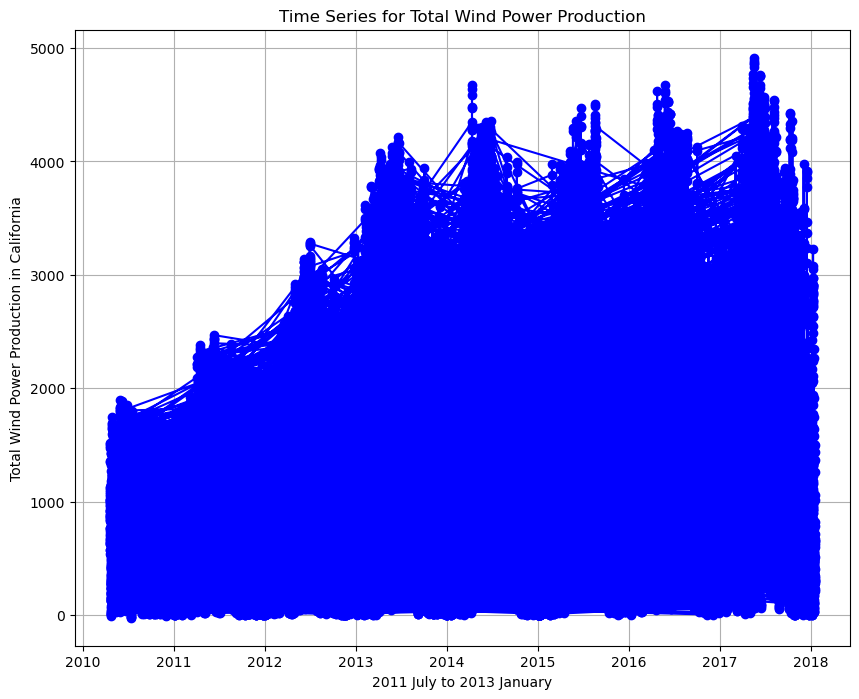

In [21]:
#I want to investigate why wind total has negative values
plt.figure(figsize=(10,8))
plt.plot(df['NewTimeStamp'], df['WIND TOTAL'], marker='o', linestyle='-', color='b')
plt.title('Time Series for Total Wind Power Production')
plt.xlabel('2011 July to 2013 January')
plt.ylabel('Total Wind Power Production in California')
plt.grid(True)
plt.show()

# I want to replace negative values with 0

In [22]:
### Replacing negative wind power values with 0
df["WIND TOTAL"]=df["WIND TOTAL"].apply(lambda x:max(0,x))
df['WIND TOTAL'].describe()

count    67584.000000
mean      1286.507382
std       1037.713356
min          0.000000
25%        368.000000
50%       1072.000000
75%       1976.000000
max       4914.000000
Name: WIND TOTAL, dtype: float64

In [23]:
#Renaming the hydro column to get the data ready for visualisation
df.rename(columns={'SMALL HYDRO':"HYDRO"}, inplace=True)

# Data Visualisations

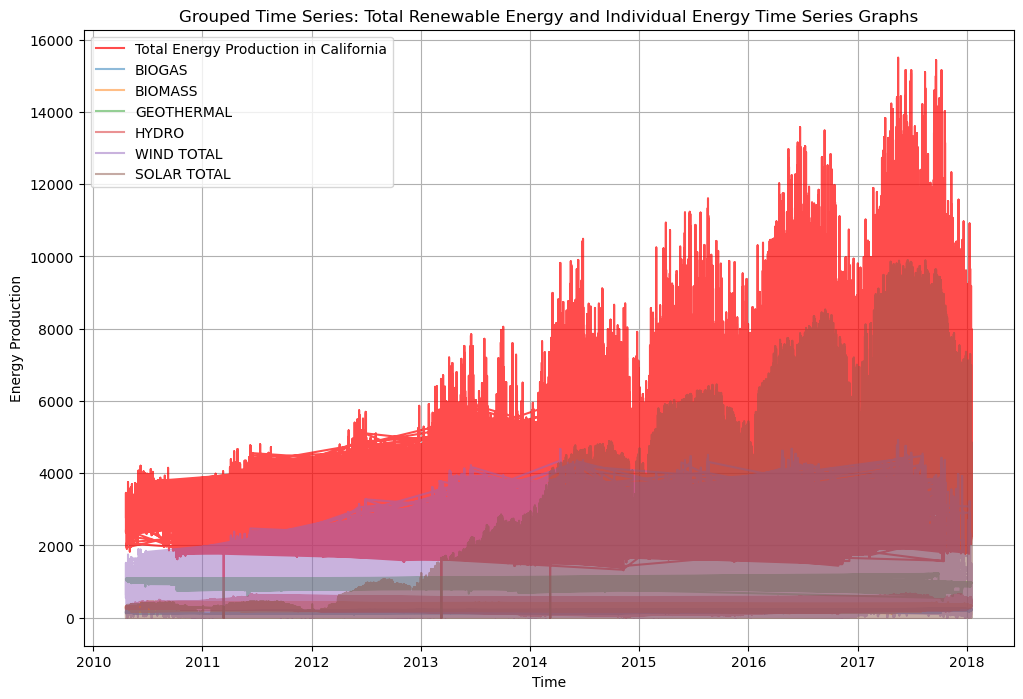

In [24]:
#Time series analysis
#plotting total energy time series
df["TOTAL ENERGY"]=df[['BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'HYDRO', 'WIND TOTAL', 'SOLAR TOTAL']].sum(axis=1)
plt.figure(figsize=(12,8))
plt.plot(df['NewTimeStamp'], df['TOTAL ENERGY'], label='Total Energy Production in California', linestyle='-', color='r', alpha=0.7)

#plotting individual energy time series
energy_cols=['BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'HYDRO', 'WIND TOTAL', 'SOLAR TOTAL']

for column in energy_cols:
    plt.plot(df['NewTimeStamp'], df[column], label=column, alpha=0.5)
    
#Customize the plots
plt.title('Grouped Time Series: Total Renewable Energy and Individual Energy Time Series Graphs')
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.legend()
plt.grid(True)
plt.show()

## Creating an interactive timeseries plot


In [25]:
# Function to update the plot based on user's choice
def plot_selected_variables(variable):
    plt.figure(figsize=(12,6))
    plt.plot(df['NewTimeStamp'], df[variable], label=variable, marker='o', linestyle='-', color='b')
    plt.title(f'Time Series Plot for {variable}')
    plt.xlabel('Time')
    plt.ylabel(f'{variable} Production in California')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Create a dropdown widget for variable selection
variable_dropdown=widgets.Dropdown(options=['TOTAL ENERGY','BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'HYDRO', 'WIND TOTAL', 'SOLAR TOTAL'],
                                     value='BIOGAS', description='Select Variable:', disable=False)

# Define an interaction between the dropdown and the plot function
interact(plot_selected_variables, variable=variable_dropdown)

interactive(children=(Dropdown(description='Select Variable:', index=1, options=('TOTAL ENERGY', 'BIOGAS', 'BI…

<function __main__.plot_selected_variables(variable)>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIMESTAMP     67584 non-null  object 
 1   BIOGAS        67584 non-null  float64
 2   BIOMASS       67584 non-null  float64
 3   GEOTHERMAL    67584 non-null  float64
 4   Hour          67584 non-null  float64
 5   HYDRO         67584 non-null  float64
 6   WIND TOTAL    67584 non-null  float64
 7   SOLAR TOTAL   67584 non-null  float64
 8   NewTimeStamp  67584 non-null  object 
 9   Time          67584 non-null  object 
 10  TOTAL ENERGY  67584 non-null  float64
dtypes: float64(8), object(3)
memory usage: 5.7+ MB


## As seen, this graph is too crowded and it is hard to identify the trends, I want to apply a smoothing technique to make the trends more visible by taking weekly averages starting on monday

In [27]:
# Set 'NewTimeStamp' as the index
# Set 'NewTimeStamp' as the index
df['NewTimeStamp'] = pd.to_datetime(df['NewTimeStamp'])
df.set_index("NewTimeStamp", inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67584 entries, 2011-07-21 to 2013-01-28
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIMESTAMP     67584 non-null  object 
 1   BIOGAS        67584 non-null  float64
 2   BIOMASS       67584 non-null  float64
 3   GEOTHERMAL    67584 non-null  float64
 4   Hour          67584 non-null  float64
 5   HYDRO         67584 non-null  float64
 6   WIND TOTAL    67584 non-null  float64
 7   SOLAR TOTAL   67584 non-null  float64
 8   Time          67584 non-null  object 
 9   TOTAL ENERGY  67584 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.7+ MB


In [29]:
df_new=df.drop(columns=["TIMESTAMP", "Hour","Time"])

In [30]:

df_weekly=df_new.resample('W-Mon').mean()

#creating a new function for interactive time series plot that demostrates weekly average energy production
def plot_weekly_ave_selected_variables(variable):
    plt.figure(figsize=(12,6))
    plt.plot(df_weekly.index, df_weekly[variable], label=variable)
    plt.title(f'Weekly Average of {variable} Production in California')
    plt.xlabel('Time')
    plt.ylabel(f'{variable} Production')
    plt.legend()
    plt.show()
    
# Create a dropdown widget for variable selection
variable_dropdown = widgets.Dropdown(options=['TOTAL ENERGY','BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'HYDRO', 'WIND TOTAL', 'SOLAR TOTAL'],
                                     value='BIOGAS', description='Select Variable:', disabled=False)

# Define an interaction between the dropdown and the plot function
interact(plot_weekly_ave_selected_variables, variable=variable_dropdown)

interactive(children=(Dropdown(description='Select Variable:', index=1, options=('TOTAL ENERGY', 'BIOGAS', 'BI…

<function __main__.plot_weekly_ave_selected_variables(variable)>

## Yearly Distribution of Renewable Energy Production in California

In [31]:
# Extracting the year from the index
df['Year'] = df.index.year

In [32]:
# Exclude the unnecessary columns before grouping and summing
df_grouped = df.drop(columns=['Time','TIMESTAMP','Hour']).groupby('Year').sum()

<Figure size 1200x800 with 0 Axes>

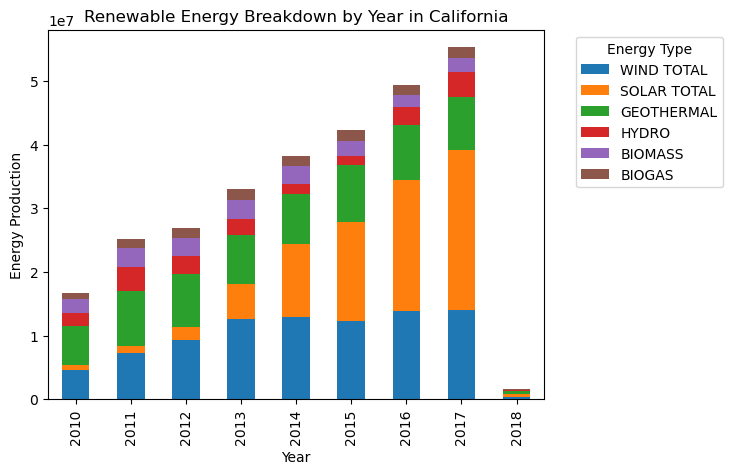

In [33]:
# Sort the DataFrame by the sum of each energy type in descending order
df_grouped_sorted = df_grouped[['BIOGAS', 'BIOMASS', 'GEOTHERMAL', 'HYDRO', 'WIND TOTAL', 'SOLAR TOTAL']] \
    .sum(axis=0).sort_values(ascending=False).index


# Plotting the bar graph
plt.figure(figsize=(12, 8))

# Plotting each energy type as a stacked bar with sorted columns
df_grouped[df_grouped_sorted].plot(kind='bar', stacked=True)

plt.title('Renewable Energy Breakdown by Year in California')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Monthly Total Renewable Energy Production Distribution  

In [34]:
#Extracting month from index
df['Month']=df.index.month_name()

In [35]:
# Defining the custom order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [36]:
# Converting 'Month' to a categorical type with custom order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

<Figure size 1200x800 with 0 Axes>

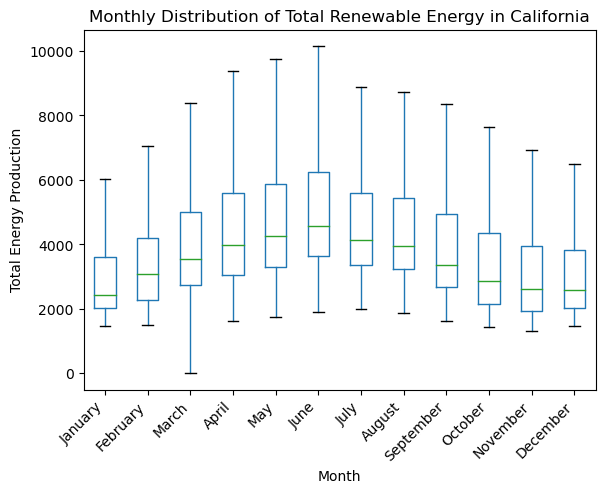

In [37]:
#Plotting the Boxplot
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column='TOTAL ENERGY', by='Month', showfliers=False, grid=False)

# Rotating x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

plt.title('Monthly Distribution of Total Renewable Energy in California')
plt.suptitle('')  # Removing default title
plt.xlabel('Month')
plt.ylabel('Total Energy Production')
plt.show()

## Solar and Wind Power Production Monthly Distribution

<Figure size 1200x800 with 0 Axes>

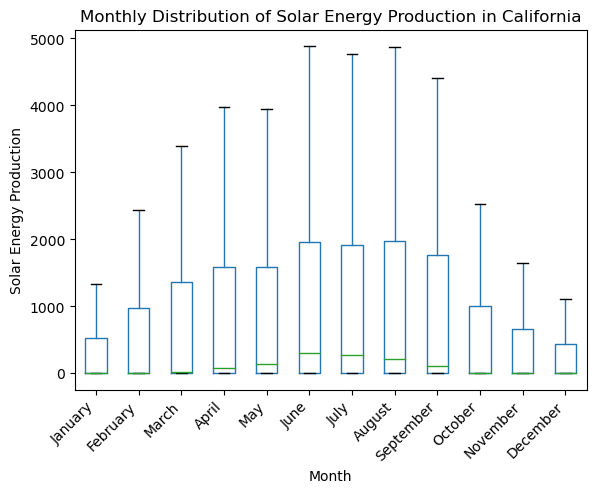

In [38]:
#Plotting the Boxplot
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column='SOLAR TOTAL', by='Month', showfliers=False, grid=False)

# Rotating x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

plt.title('Monthly Distribution of Solar Energy Production in California')
plt.suptitle('')  # Removing default title
plt.xlabel('Month')
plt.ylabel('Solar Energy Production')
plt.show()

<Figure size 1200x800 with 0 Axes>

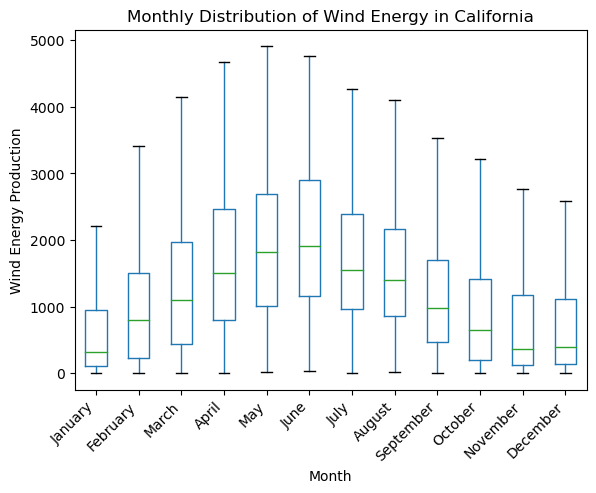

In [39]:
#Plotting the Boxplot
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column='WIND TOTAL', by='Month', showfliers=False, grid=False)

# Rotating x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

plt.title('Monthly Distribution of Wind Energy in California')
plt.suptitle('')  # Removing default title
plt.xlabel('Month')
plt.ylabel('Wind Energy Production')
plt.show()

## Hourly Solar Energy Production Distribution¶

In [40]:
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,HYDRO,WIND TOTAL,SOLAR TOTAL,Time,TOTAL ENERGY,Year,Month
NewTimeStamp,,,,,,,,,,,,
2011-07-21,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,1607.0,0.0,00:00:00,3656.0,2011,July
2011-07-21,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,1619.0,0.0,01:00:00,3661.0,2011,July
2011-07-21,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,1660.0,0.0,02:00:00,3699.0,2011,July
2011-07-21,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,1633.0,0.0,03:00:00,3673.0,2011,July
2011-07-21,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,1520.0,0.0,04:00:00,3566.0,2011,July


<Figure size 1200x800 with 0 Axes>

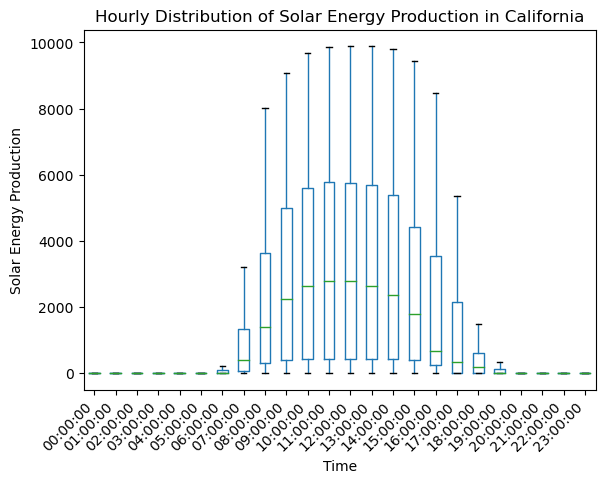

In [41]:
#Plotting the Boxplot
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column='SOLAR TOTAL', by='Time', showfliers=False, grid=False)

# Rotating x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')

plt.title('Hourly Distribution of Solar Energy Production in California')
plt.suptitle('')  # Removing default title
plt.xlabel('Time')
plt.ylabel('Solar Energy Production')
plt.show()